In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d kasikrit/308-456-dogs-vs-cats-dataset

100% 545M/546M [00:29<00:00, 22.8MB/s]
100% 546M/546M [00:29<00:00, 19.2MB/s]


In [3]:
import zipfile
zip_ref=zipfile.ZipFile('/content/308-456-dogs-vs-cats-dataset.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [26]:
import tensorflow
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import matplotlib.image as img

In [3]:
train_data = "/content/dataset_dogs_vs_cats/train"
validation_data = '/content/dataset_dogs_vs_cats/valid'

In [4]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'

)

In [5]:
validation_datagen = ImageDataGenerator(
    rescale = 1./255
)

In [6]:
train_generator = train_datagen.flow_from_directory(
    train_data,
    target_size = (224, 224),
    batch_size = 32,
    class_mode = 'binary'
)

Found 18697 images belonging to 2 classes.


In [7]:
validation_generator = validation_datagen.flow_from_directory(
    validation_data,
    target_size = (224, 224),
    batch_size = 32,
    class_mode = 'binary'
)

Found 6303 images belonging to 2 classes.


In [8]:
from tensorflow.keras.applications import Xception
from tensorflow.keras import layers

base_model = Xception(
    weights='imagenet',
    include_top=False,
    input_shape=(224, 224, 3)
)

In [9]:
model = Sequential()
model.add(base_model)
model.add(layers.GlobalAveragePooling2D())
model.add(Dense(256,activation = 'relu'))
model.add(Dropout(0.2))
model.add(layers.Dense(1, activation = 'sigmoid'))

for layer in base_model.layers:
  layer.trainable = False

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = 'accuracy')


In [10]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // 32,
    epochs=15,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // 32
)

Epoch 1/15
584/584 [==============================] - 316s 526ms/step - loss: 0.0865 - accuracy: 0.9651 - val_loss: 0.0370 - val_accuracy: 0.9866
Epoch 2/15
584/584 [==============================] - 282s 483ms/step - loss: 0.0707 - accuracy: 0.9722 - val_loss: 0.0450 - val_accuracy: 0.9842
Epoch 3/15
584/584 [==============================] - 282s 482ms/step - loss: 0.0674 - accuracy: 0.9724 - val_loss: 0.0336 - val_accuracy: 0.9872
Epoch 4/15
584/584 [==============================] - 299s 512ms/step - loss: 0.0638 - accuracy: 0.9746 - val_loss: 0.0313 - val_accuracy: 0.9880
Epoch 5/15
584/584 [==============================] - 295s 504ms/step - loss: 0.0642 - accuracy: 0.9743 - val_loss: 0.0358 - val_accuracy: 0.9879
Epoch 6/15
584/584 [==============================] - 297s 509ms/step - loss: 0.0595 - accuracy: 0.9758 - val_loss: 0.0311 - val_accuracy: 0.9893
Epoch 7/15
584/584 [==============================] - 296s 507ms/step - loss: 0.0584 - accuracy: 0.9758 - val_loss: 0.0312 -

In [14]:
model.save('dogVsCat_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


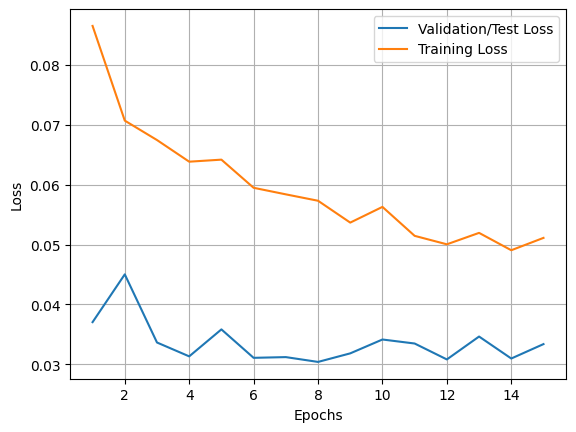

In [11]:
# Plotting our loss charts
import matplotlib.pyplot as plt

history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_loss_values, label='Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label='Training Loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

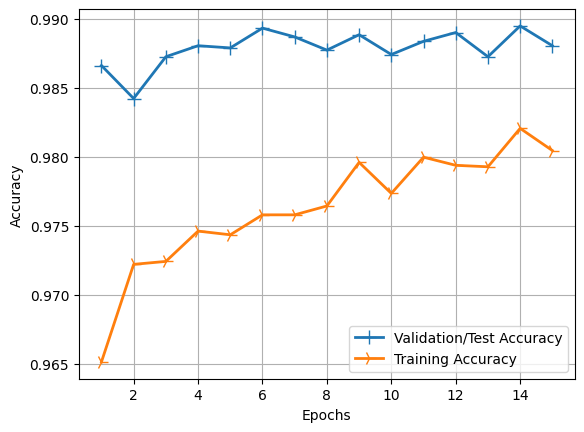

In [12]:
# Plotting our accuracy charts
import matplotlib.pyplot as plt

history_dict = history.history

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_acc_values, label='Validation/Test Accuracy')
line2 = plt.plot(epochs, acc_values, label='Training Accuracy')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

(1, 224, 224, 3)


1/1 [==============================] - 1s 891ms/step
[[2.6264155e-07]]
[[2.6264155e-07]]
this is cat


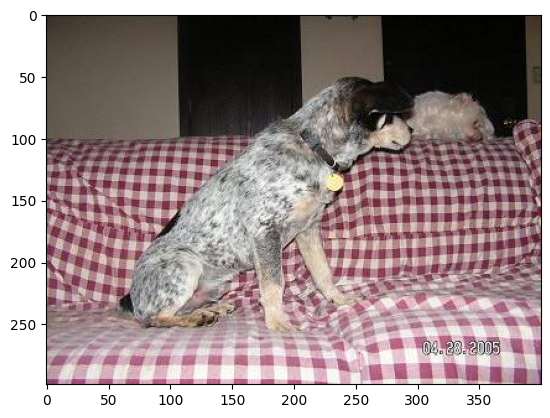

In [19]:
import numpy as np
import tensorflow
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import load_img
from tensorflow.keras import models
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as img

image_path = '/content/dataset_dogs_vs_cats/valid/dogs/dog.10024.jpg'
model = models.load_model('/content/dogVsCat_model.h5')
test_image = load_img(image_path,target_size = (224,224,3))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis = 0)
print(test_image.shape)
result = model.predict(test_image)
print(result)
print(result)
if result[0][0] == 1:
  print("This is dog")
else:
  print("this is cat")
  # reading the image
testImage = img.imread(image_path)

# displaying the modified image
plt.imshow(testImage)

In [35]:
# Part 4 - Making a single prediction

import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img('/content/animal-4118585_640.jpg', target_size = (224,224,3))
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)

1/1 [==============================] - 0s 36ms/step


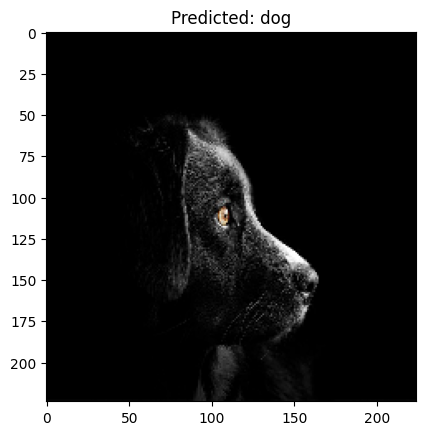

In [36]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming result contains the model's prediction
if result[0] < 0:
    prediction = "cat"
else:
    prediction = "dog"

# Assuming test_image is a NumPy array with shape (1, 224, 224, 3)
testImage = test_image.squeeze()

# Display the image with the prediction
plt.imshow(testImage)
plt.title(f"Predicted: {prediction}")
plt.show()
